In [ ]:
# =================================================
# 🌍 Earthquake 3D Plotting - Exploration Notebook
# =================================================

In [1]:
# --- 1. Imports ---

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


# --- 2. Load the data ---

df = pd.read_csv("../data/Jan_June2025.csv")

# Quick overview
print("Shape:", df.shape)
df.head()

Shape: (4751, 11)


,##Index,EventDate,EventTimeInDay,LocX [m],LocY [m],LocZ [m],Local Magnitude,Log Potency [log m^3],Log Energy [log J],Log(EnergyS/EnergyP),TriggerCount
0,1,1/1/2025,0:13:36,21635.2,14880.1,4151.0,-2.7,-3.01,0.00,0.94,6
1,2,1/1/2025,0:52:26,21517.7,14801.4,4015.5,-3.0,-3.22,-0.50,0.90,6
2,3,1/1/2025,1:35:47,21513.2,14800.7,4007.7,-2.9,-3.65,0.26,1.00,5
3,4,1/1/2025,1:38:09,21879.1,14965.2,3488.4,-3.1,-3.94,0.16,1.11,5
4,5,1/1/2025,1:44:52,21664.0,14946.2,3744.9,-2.6,-3.10,0.49,0.74,12


In [2]:
# --- 3. Inspect data ---

# Column info & missing values
df.info()
df.describe()

# Check for NaN values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ##Index                4751 non-null   int64  
 1   EventDate              4751 non-null   object 
 2   EventTimeInDay         4751 non-null   object 
 3   LocX [m]               4751 non-null   float64
 4   LocY [m]               4751 non-null   float64
 5   LocZ [m]               4751 non-null   float64
 6   Local Magnitude        4751 non-null   float64
 7   Log Potency [log m^3]  4751 non-null   float64
 8   Log Energy [log J]     4751 non-null   float64
 9   Log(EnergyS/EnergyP)   4751 non-null   float64
 10  TriggerCount           4751 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 408.4+ KB


##Index                  0
EventDate                0
EventTimeInDay           0
LocX [m]                 0
LocY [m]                 0
LocZ [m]                 0
Local Magnitude          0
Log Potency [log m^3]    0
Log Energy [log J]       0
Log(EnergyS/EnergyP)     0
TriggerCount             0
dtype: int64

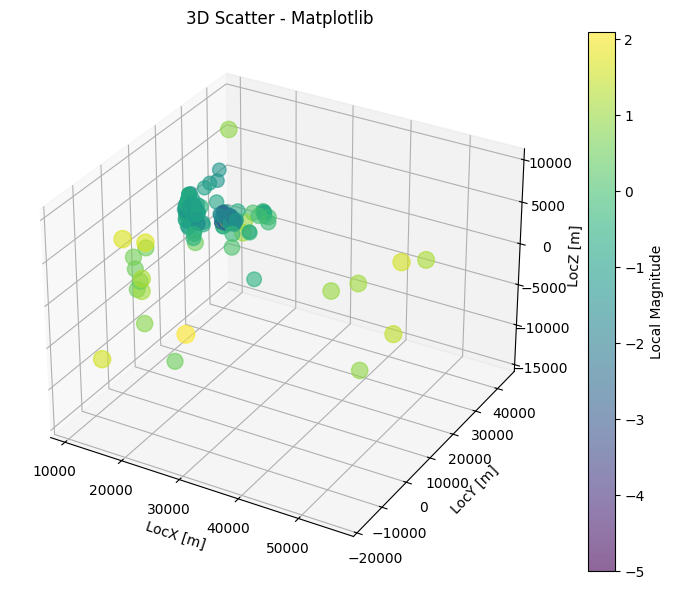

In [3]:
# --- 4. Static 3D Plot with Matplotlib ---

x, y, z, mag = df["LocX [m]"], df["LocY [m]"], df["LocZ [m]"], df["Local Magnitude"]
sizes = (mag - mag.min() + 1) * 20

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(x, y, z, c=mag, s=sizes, cmap="viridis", alpha=0.6)

ax.set_xlabel("LocX [m]")
ax.set_ylabel("LocY [m]")
ax.set_zlabel("LocZ [m]")
plt.colorbar(sc, label="Local Magnitude")
plt.title("3D Scatter - Matplotlib")
plt.show()


In [6]:
# --- 6. Next steps for exploration ---
# Example ideas:
# - Filter events by date
# - Highlight largest magnitudes
# - Cluster events by location

# Example: Filter magnitudes greater than -2.5
df_filtered = df[df["Local Magnitude"] > -2.5]
df_filtered.head()


,##Index,EventDate,EventTimeInDay,LocX [m],LocY [m],LocZ [m],Local Magnitude,Log Potency [log m^3],Log Energy [log J],Log(EnergyS/EnergyP),TriggerCount
10,15,1/1/2025,6:18:44,21909.6,14933.4,3505.5,-2.2,-3.02,1.33,1.02,17
17,22,1/1/2025,9:38:53,21516.8,14808.9,4003.1,-2.4,-2.46,0.08,0.27,11
29,35,1/1/2025,18:37:27,21746.7,14817.0,4259.3,-2.1,-2.13,0.40,0.48,16
35,43,1/1/2025,20:13:18,21635.3,14926.5,3909.8,-2.2,-3.15,1.70,1.64,16
54,62,1/2/2025,4:39:14,22122.7,14920.2,3777.6,-2.4,-2.27,-0.35,0.48,15
